<a href="https://colab.research.google.com/github/Guliko24/CF969_SU/blob/main/Assignment/CF969_Assignment_2_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will use data from a random sample of loans obtained from a peer-to-peer
lending platform with the goal to predict who will default at its loan using features provided in the
data.
For this assignment there are three .csv data files:

• trainData: This is the dataset on which you will train all your models.

• testData: This is the dataset on which you will evaluate your model’s fit.

• varDescription: This contains a description of the features


In [1]:
#import libraries as needed
import numpy as np
import os
import pickle
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Path to the folder with data
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/gdrive/MyDrive/CF969_Assignment_2'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['varDescription.csv', 'CF969-7-SU-CO Assignment 2.pdf', 'testData.csv', 'trainData.csv']


# **Let's do some exploratory data analysis (EDA)**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv('/content/gdrive/MyDrive/CF969_Assignment_2/trainData.csv')

# Display basic information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211456 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226067 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225887 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226062 non-null  float64
 13  mths_since_las

In [5]:
# Display the first few rows
print(train_data.head())

   id  member_id  loan_amnt  int_rate  installment grade emp_length  \
0 NaN        NaN      18600     10.99       608.86     B    6 years   
1 NaN        NaN       2000     17.97        72.28     D    4 years   
2 NaN        NaN      12000     12.29       400.24     C  10+ years   
3 NaN        NaN      16000     19.42       589.90     D    7 years   
4 NaN        NaN      22525     16.02       548.01     C  10+ years   

  home_ownership  annual_inc loan_status  ...  total_rec_late_fee  recoveries  \
0           RENT     80000.0  Fully Paid  ...                 0.0         0.0   
1       MORTGAGE     55400.0     Current  ...                 0.0         0.0   
2            OWN     60000.0  Fully Paid  ...                 0.0         0.0   
3           RENT     64000.0     Current  ...                 0.0         0.0   
4       MORTGAGE     94080.0  Fully Paid  ...                 0.0         0.0   

   collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0          

In [6]:
# Get basic statistics of numerical columns
print(train_data.describe())

        id  member_id      loan_amnt       int_rate    installment  \
count  0.0        0.0  226067.000000  226067.000000  226067.000000   
mean   NaN        NaN   15057.970978      13.090849     446.346484   
std    NaN        NaN    9177.346912       4.826360     266.990994   
min    NaN        NaN     500.000000       5.310000      16.310000   
25%    NaN        NaN    8000.000000       9.490000     252.930000   
50%    NaN        NaN   12975.000000      12.620000     378.200000   
75%    NaN        NaN   20000.000000      15.990000     594.005000   
max    NaN        NaN   40000.000000      30.990000    1714.540000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  2.260670e+05  225887.000000  226062.000000   226062.000000   
mean   7.820852e+04      18.803682       0.308331        0.579098   
std    8.235856e+04      14.094897       0.863639        0.886968   
min    0.000000e+00       0.000000       0.000000        0.000000   
25%    4.606050e+04     

In [7]:
# Check for missing values
print(train_data.isnull().sum())

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [8]:
# Let's check the distribution of the target variable (e.g., 'loan_status')tion
if 'loan_status' in train_data.columns:
    print(train_data['loan_status'].value_counts(normalize=True))

loan_status
Fully Paid                                             0.460673
Current                                                0.406955
Charged Off                                            0.115461
Late (31-120 days)                                     0.009798
In Grace Period                                        0.004224
Late (16-30 days)                                      0.001707
Does not meet the credit policy. Status:Fully Paid     0.000889
Does not meet the credit policy. Status:Charged Off    0.000265
Default                                                0.000027
Name: proportion, dtype: float64


we can see that this is an imbalanced data, with Loan=charged off being around 12% of the total data.

in addition, there is another category of loan_status= Does not meet the credit policy. Status:Charged Off. This is also charged off, but we will not consider this as Target Value=1.

In [9]:
# Let's see unique values in a specific categorical column (e.g., 'grade')
if 'grade' in train_data.columns:
    print(train_data['grade'].value_counts())

grade
B    66392
C    65196
A    43206
D    32286
E    13593
F     4190
G     1204
Name: count, dtype: int64


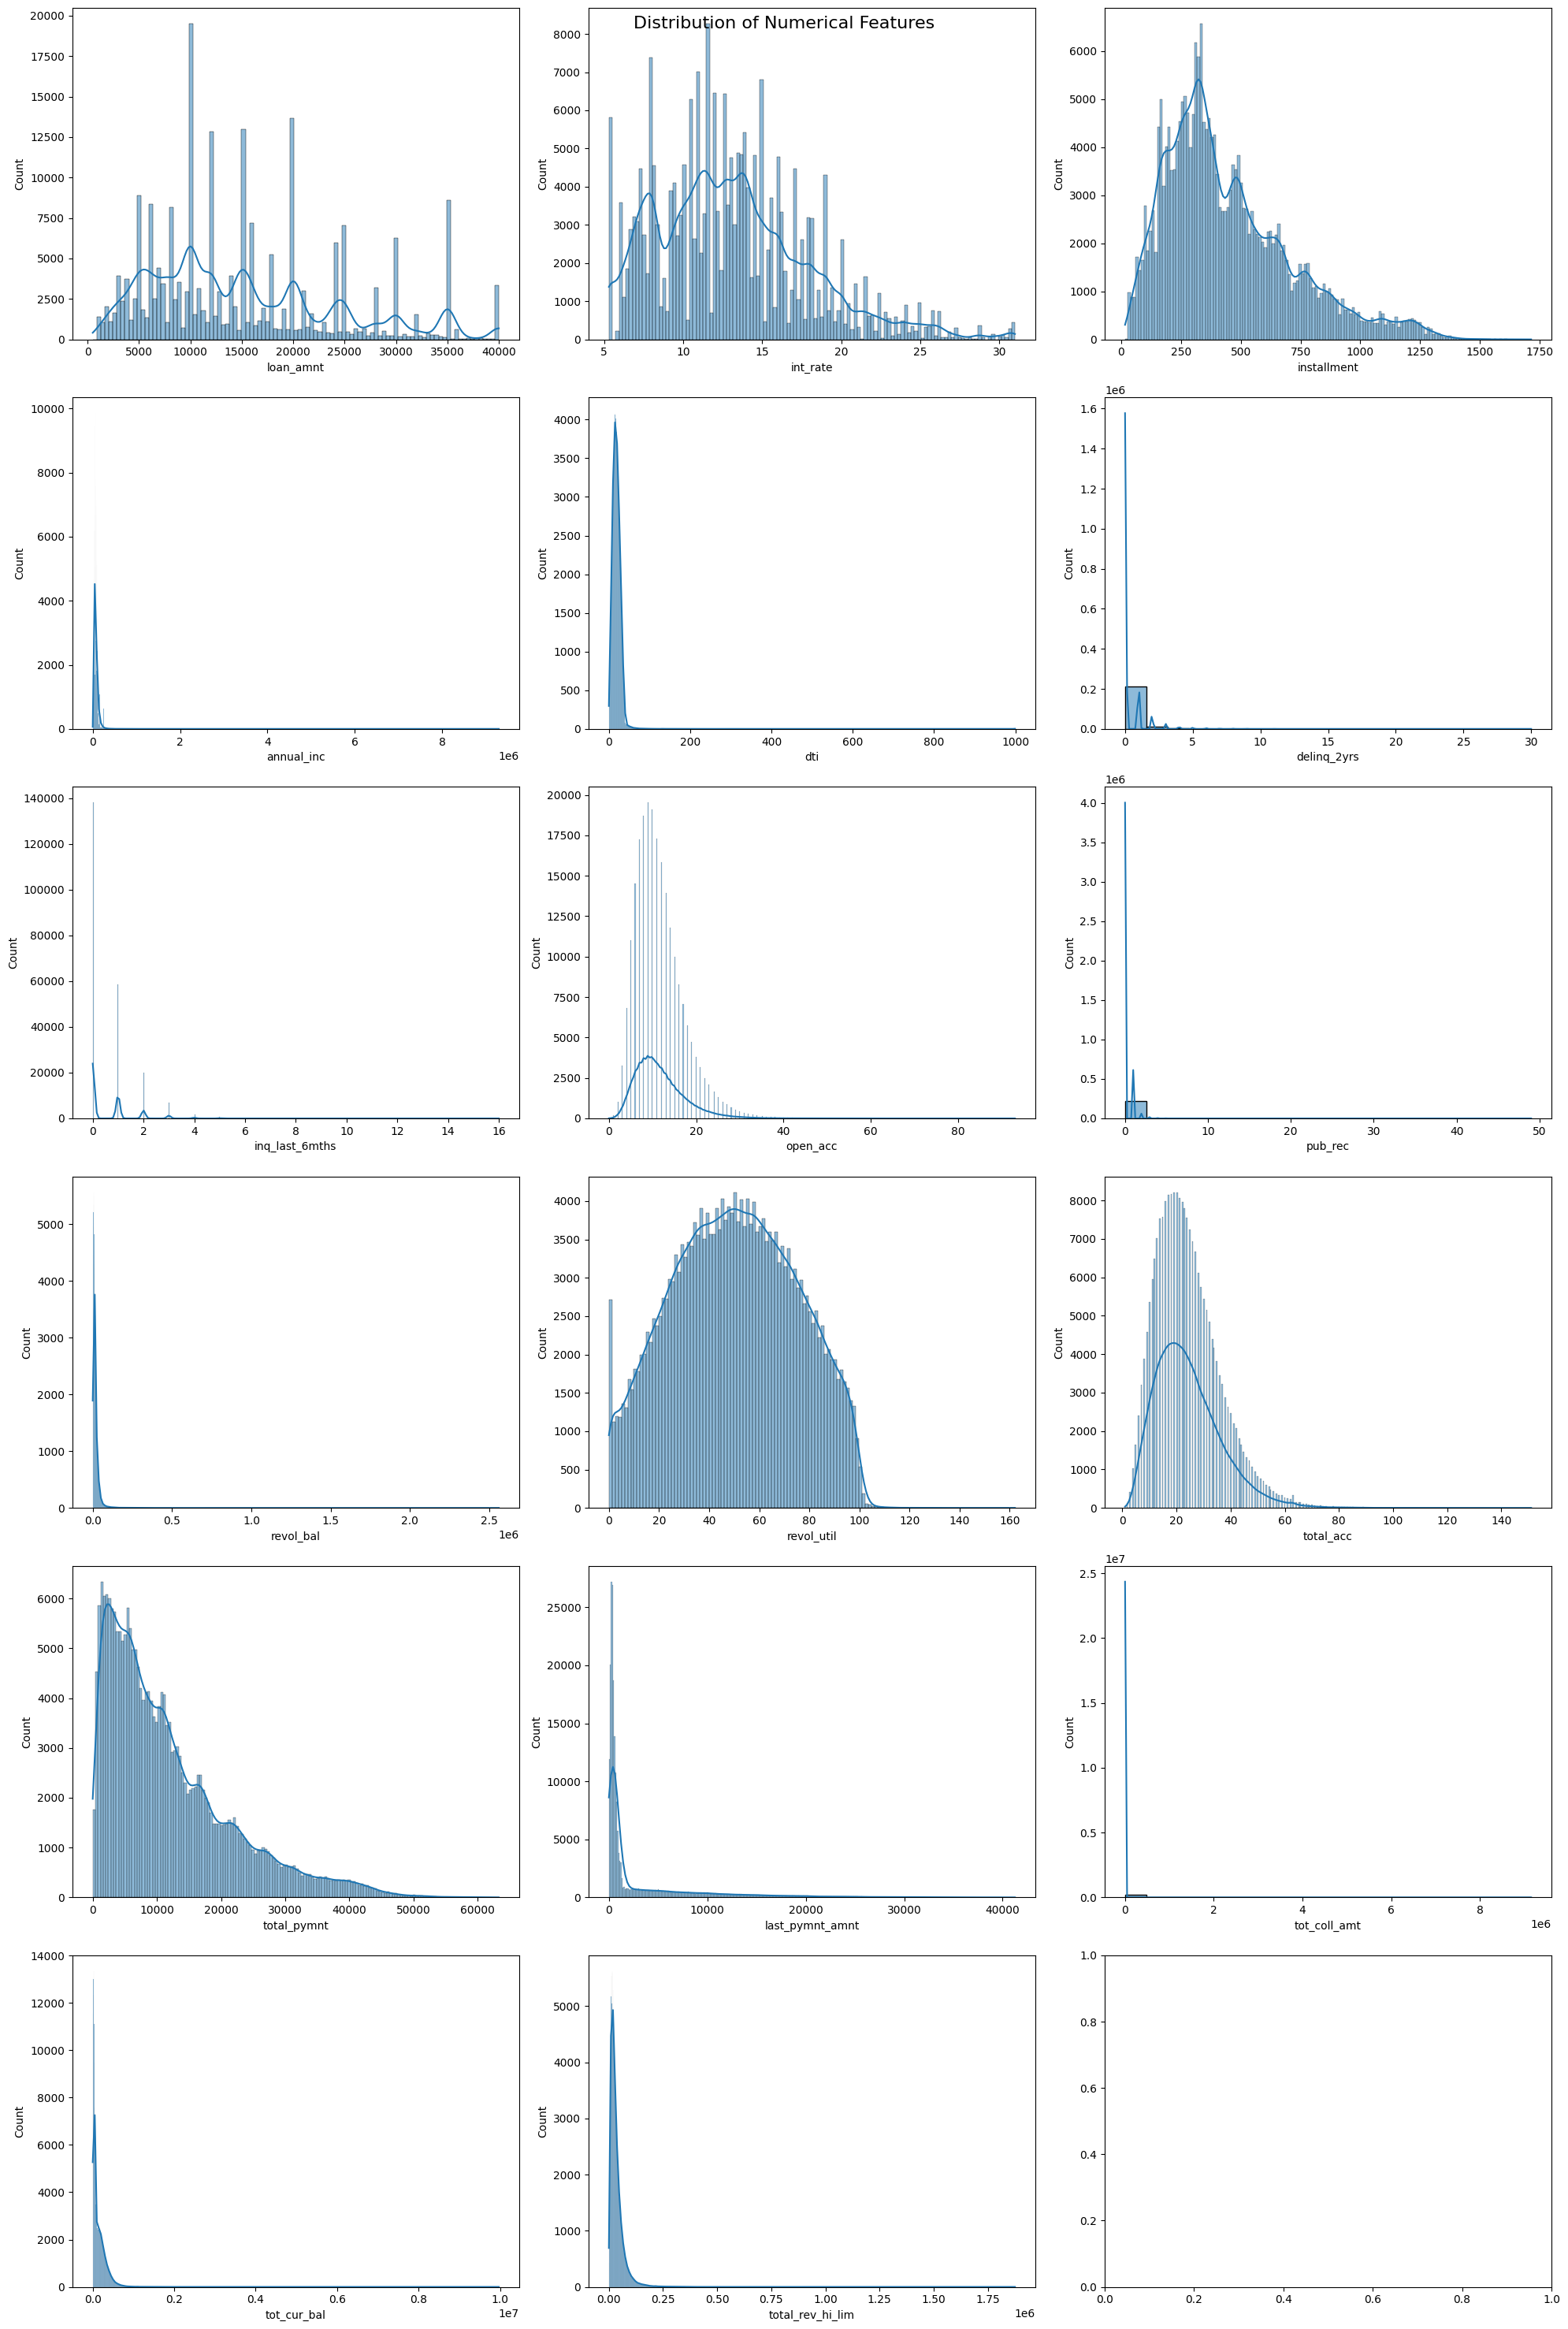

<ipython-input-10-d9e69bbd6fe5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-10-d9e69bbd6fe5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-10-d9e69bbd6fe5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-10-d9e69bbd6fe5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)


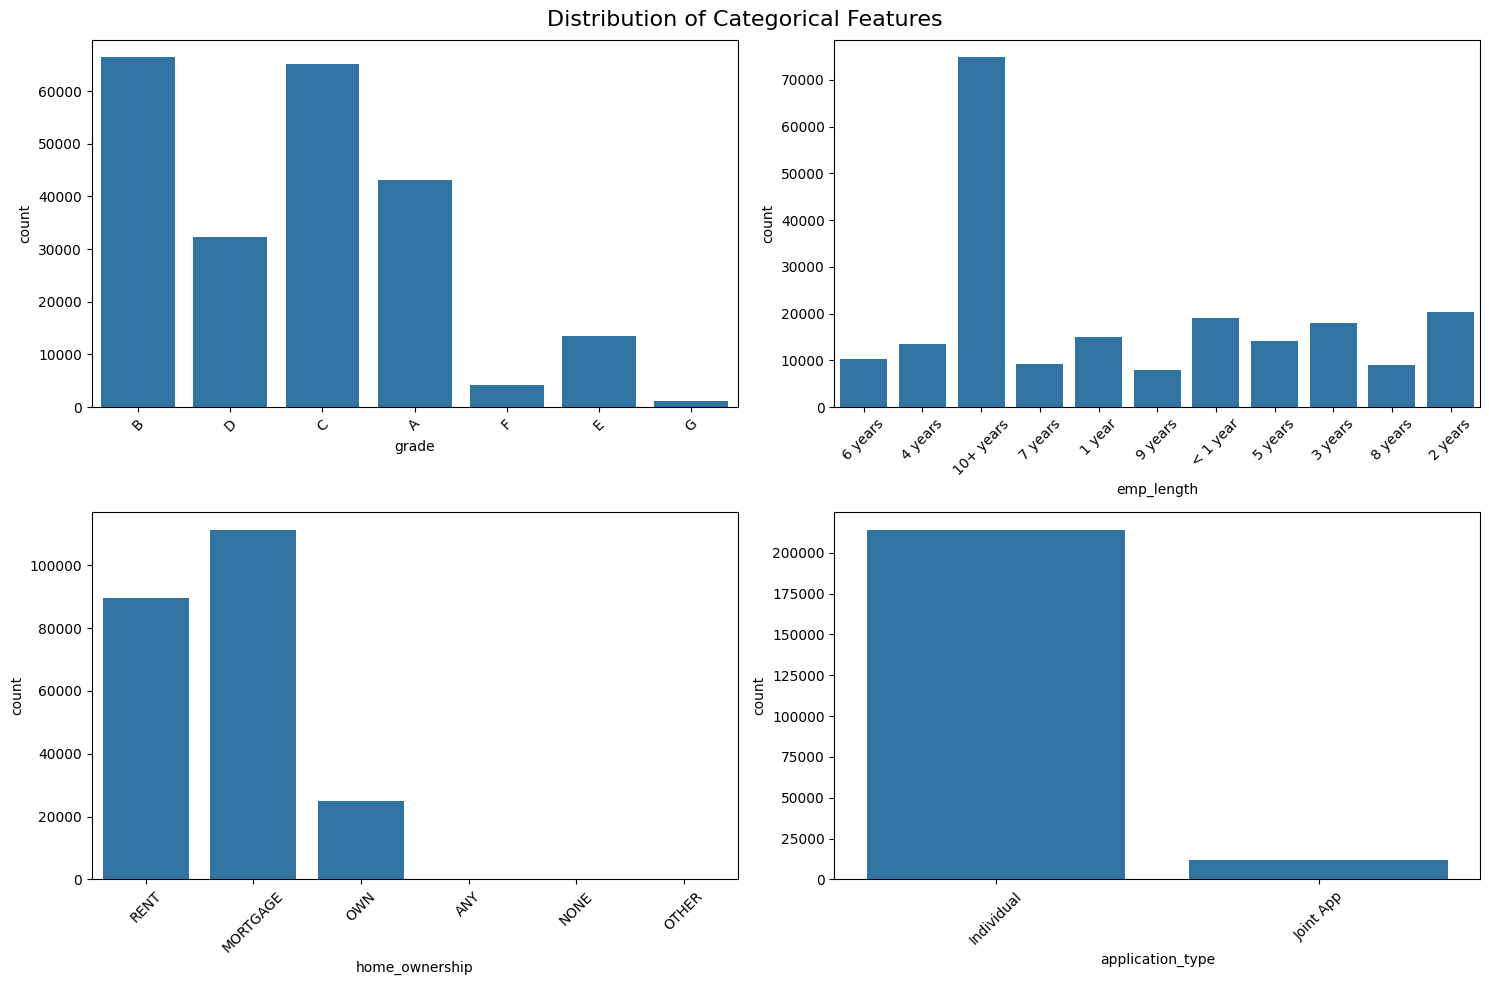

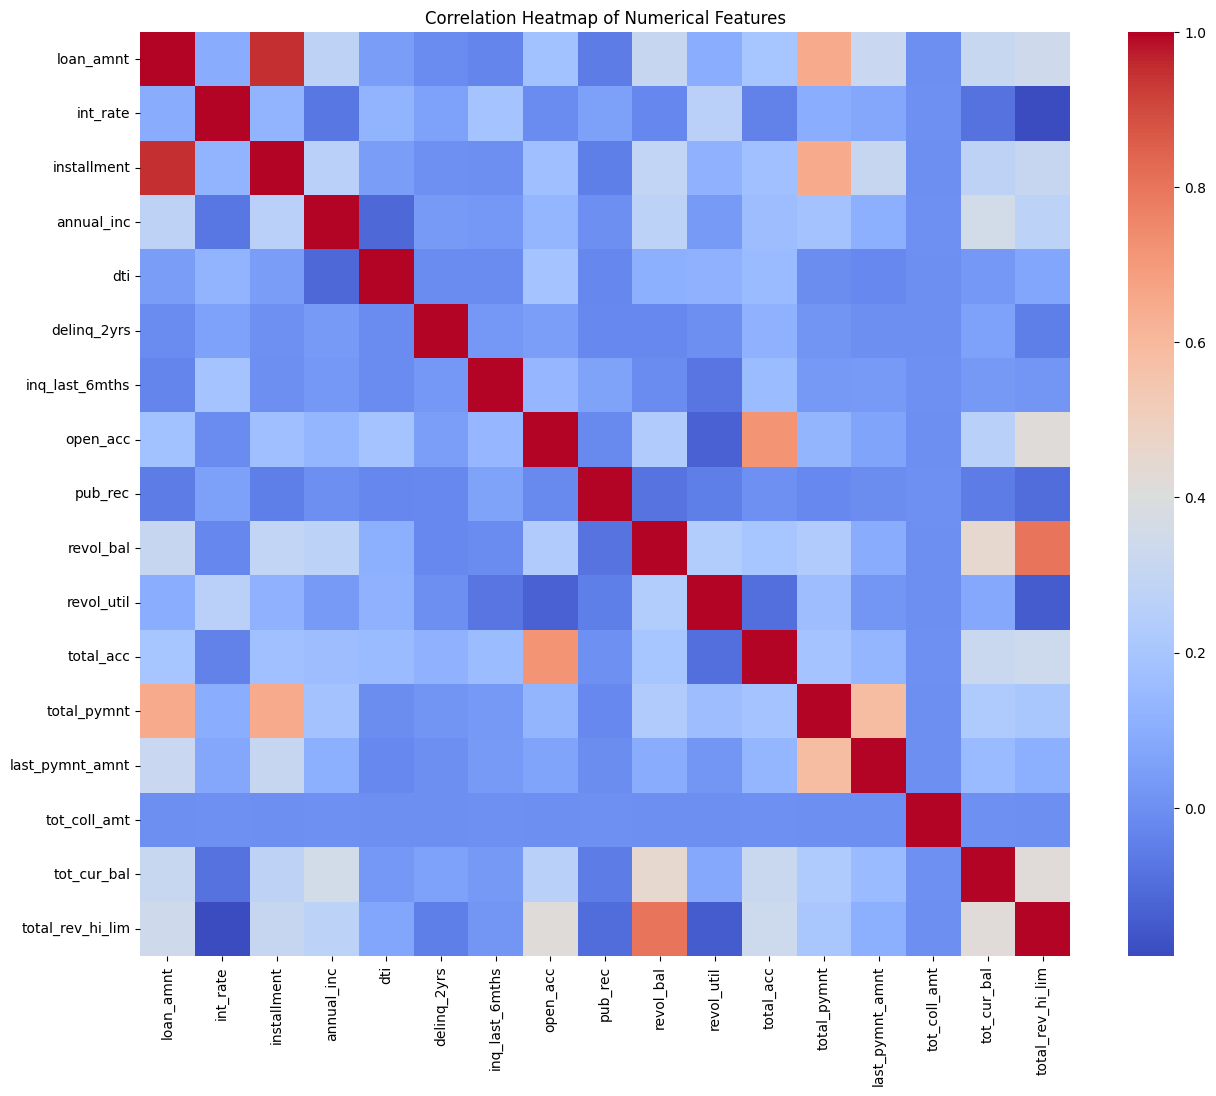

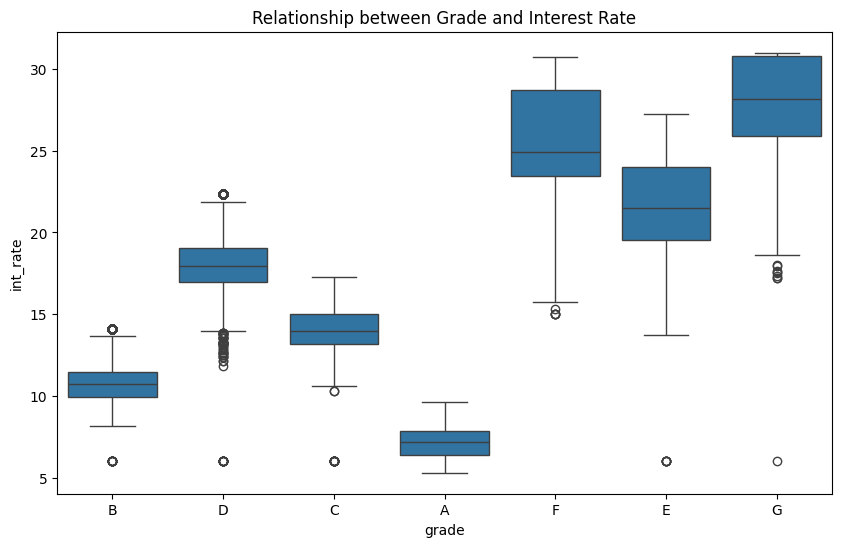

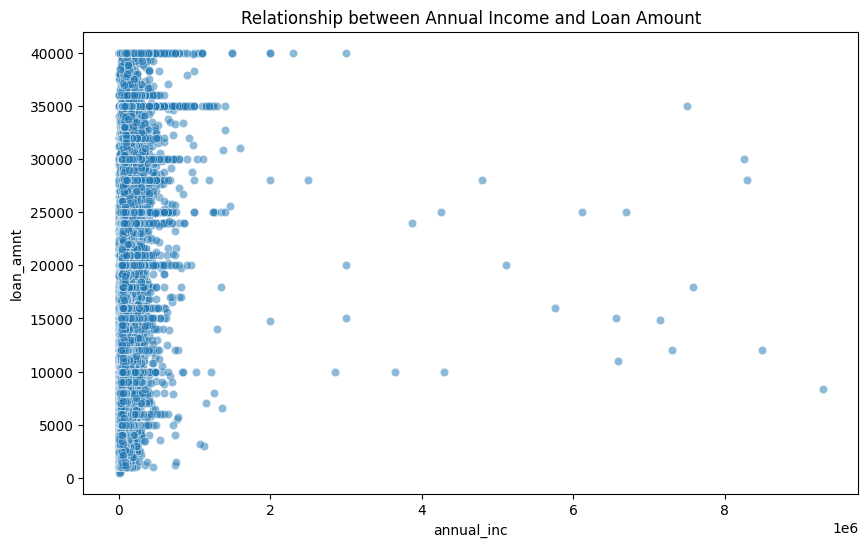

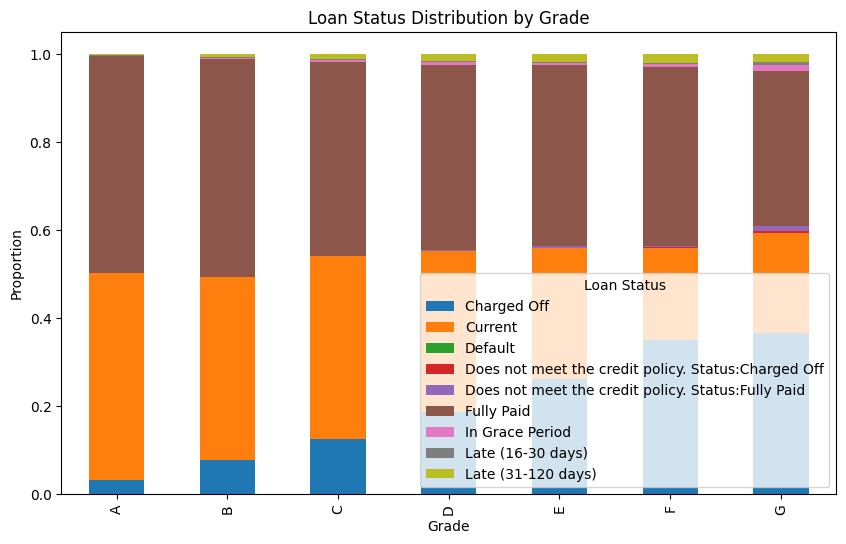

In [10]:
# Explore key numerical features
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                      'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                      'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
                      'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle('Distribution of Numerical Features', fontsize=16)
for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_data, x=feature, ax=axes[i//3, i%3], kde=True)
plt.tight_layout()
plt.show()

# Explore key categorical features
categorical_features = ['grade', 'emp_length', 'home_ownership', 'application_type']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)
for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_data, x=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr_matrix = train_data[numerical_features].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Relationship between 'grade' and 'int_rate'
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=train_data)
plt.title('Relationship between Grade and Interest Rate')
plt.show()

# Relationship between 'loan_amnt' and 'annual_inc'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=train_data, alpha=0.5)
plt.title('Relationship between Annual Income and Loan Amount')
plt.show()

# Loan status by grade
loan_status_by_grade = pd.crosstab(train_data['grade'], train_data['loan_status'], normalize='index')
loan_status_by_grade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.show()

## **Data Pre-processing**

1.   We have large number of missing values, that we should remove
2.   All categorical data should be coverted to numerical values
3.   Column "loan_status" is our target value, which Charged off being = 1 , everything else = 0
4. column "len_employment" should be imputed with median




**Data Pre-Processing of TrainCSV**

In [11]:
# Check for missing values
print(train_data.isnull().sum())

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

==================================================================

TASK 1: Create a new variable from trainData called “y” which takes the value = 1 if the column “loan status”
has the value “Charged Off” and 0 otherwise.

Let's pre-process the Trainig Data first

In [12]:
# Create the new variable 'y'
train_data['y'] = (train_data['loan_status'] == 'Charged Off').astype(int)

# Verify the results
print(train_data['y'].value_counts())
print("\nSample of the data:")
print(train_data[['loan_status', 'y']].head(10))

# Calculate the percentage of charged off loans
percent_charged_off = (train_data['y'].sum() / len(train_data)) * 100
print(f"\nPercentage of charged off loans: {percent_charged_off:.2f}%")

y
0    199965
1     26102
Name: count, dtype: int64

Sample of the data:
   loan_status  y
0   Fully Paid  0
1      Current  0
2   Fully Paid  0
3      Current  0
4   Fully Paid  0
5  Charged Off  1
6   Fully Paid  0
7      Current  0
8   Fully Paid  0
9      Current  0

Percentage of charged off loans: 11.55%


In [13]:
#Let's save this to  a new CSV file
train_data.to_csv('trainData_new.csv', index=False)

#Read the new file
new_train_data = pd.read_csv('trainData_new.csv')

#check the new columns
#print(new_train_data.head())


In [14]:
#Let's drop columns which are empty or not needed anymore

columns_to_drop=['id','member_id','mths_since_last_delinq', 'loan_status']
new_train_data.drop(columns_to_drop, axis=1, inplace=True)
print(new_train_data.head())



   loan_amnt  int_rate  installment grade emp_length home_ownership  \
0      18600     10.99       608.86     B    6 years           RENT   
1       2000     17.97        72.28     D    4 years       MORTGAGE   
2      12000     12.29       400.24     C  10+ years            OWN   
3      16000     19.42       589.90     D    7 years           RENT   
4      22525     16.02       548.01     C  10+ years       MORTGAGE   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  ...  recoveries  \
0     80000.0  12.92          0.0             0.0  ...         0.0   
1     55400.0  10.62          1.0             2.0  ...         0.0   
2     60000.0  17.92          0.0             0.0  ...         0.0   
3     64000.0   3.90          1.0             0.0  ...         0.0   
4     94080.0  19.08          1.0             0.0  ...         0.0   

   collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0                      0.0         15705.09                         0.0   
1 

In [15]:
columns_with_missing_values = ['dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                               'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

new_train_data.dropna(subset=columns_with_missing_values, inplace=True) ####these are rows with missing values



In [16]:
#let's convert all categorical value columns into numerical
# convert (home_ownership) categorical variable into a continuous
home_ownership_mapping = {
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 3,
    'ANY': 4,
    'NONE': 5,
    'OTHER': 6
}

# Replace the values in the 'home_ownership' column with their numerical values
new_train_data['home_ownership'].replace(home_ownership_mapping, inplace=True)

In [17]:
# convert (grade) categorical variable into a continuous
from sklearn.preprocessing import LabelEncoder

# LabelEncoder initialization
label_encoder = LabelEncoder()

# Apply Label Encoding to 'grade' column
new_train_data['grade'] = label_encoder.fit_transform(new_train_data['grade'])

In [18]:
# convert (application_type) categorical variable into a continuous
# Replace 'Individual' with 0 and 'Joint App' with 1 in the same column
new_train_data['application_type'].replace({'Individual': 0, 'Joint App': 1}, inplace=True)

In [19]:
# convert emp_length values to numerical labels
emp_length_values = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Replace the values in the 'emp_length' column with their numerical values
new_train_data['emp_length'].replace(emp_length_values, inplace=True)

# impute the missing values in column (emp_length)
# find the median of 'emp_length' column
emp_length_median = new_train_data['emp_length'].median()

# Replace missing values in 'emp_length' column with the median value
new_train_data['emp_length'].fillna(emp_length_median, inplace=True)


In [20]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218604 entries, 0 to 226066
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   218604 non-null  int64  
 1   int_rate                    218604 non-null  float64
 2   installment                 218604 non-null  float64
 3   grade                       218604 non-null  int64  
 4   emp_length                  218604 non-null  float64
 5   home_ownership              218604 non-null  int64  
 6   annual_inc                  218604 non-null  float64
 7   dti                         218604 non-null  float64
 8   delinq_2yrs                 218604 non-null  float64
 9   inq_last_6mths              218604 non-null  float64
 10  open_acc                    218604 non-null  float64
 11  pub_rec                     218604 non-null  float64
 12  revol_bal                   218604 non-null  int64  
 13  revol_util         

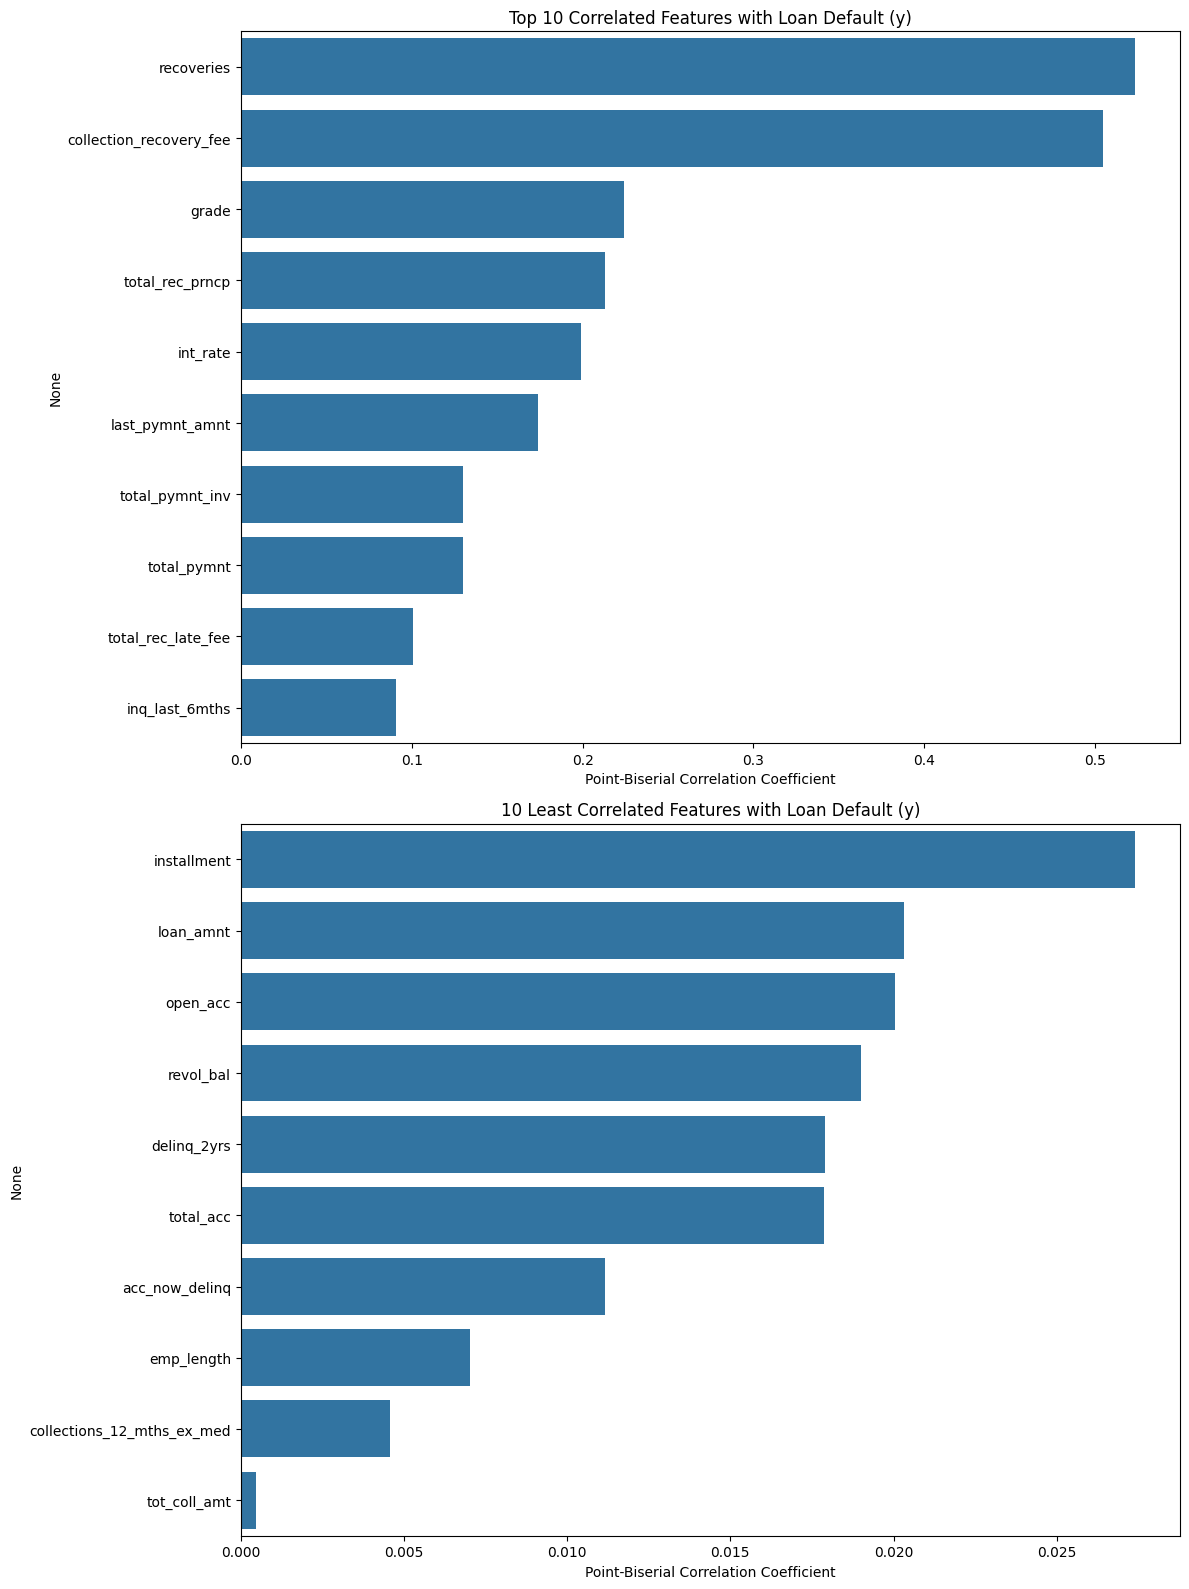

Top 10 correlated features:
recoveries: 0.5234
collection_recovery_fee: 0.5048
grade: 0.2244
total_rec_prncp: -0.2134
int_rate: 0.1991
last_pymnt_amnt: -0.1739
total_pymnt_inv: -0.1298
total_pymnt: -0.1298
total_rec_late_fee: 0.1008
inq_last_6mths: 0.0909

10 Least correlated features:
installment: 0.0274
loan_amnt: 0.0203
open_acc: 0.0200
revol_bal: -0.0190
delinq_2yrs: 0.0179
total_acc: 0.0179
acc_now_delinq: 0.0112
emp_length: -0.0070
collections_12_mths_ex_med: 0.0046
tot_coll_amt: -0.0005


In [21]:
# Now we can proceed with the correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.preprocessing import LabelEncoder



def calculate_correlations(df):
    correlations = {}
    for column in df.columns:
        if column != 'y' and df[column].dtype in ['int64', 'float64']:
            correlation, _ = pointbiserialr(df['y'], df[column])
            correlations[column] = correlation
    return pd.Series(correlations)

def plot_correlations(correlations):
    # Sort correlations by absolute value
    correlations_sorted = correlations.abs().sort_values(ascending=False)

    # Get top 10 and bottom 10 correlated features
    top_10 = correlations_sorted.head(10)
    bottom_10 = correlations_sorted.tail(10)

    # Plot correlations
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    # Top 10 correlations
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax1)
    ax1.set_title('Top 10 Correlated Features with Loan Default (y)')
    ax1.set_xlabel('Point-Biserial Correlation Coefficient')

    # Bottom 10 correlations
    sns.barplot(x=bottom_10.values, y=bottom_10.index, ax=ax2)
    ax2.set_title('10 Least Correlated Features with Loan Default (y)')
    ax2.set_xlabel('Point-Biserial Correlation Coefficient')

    plt.tight_layout()
    plt.show()

    # Print top 10 and bottom 10 correlated features
    print("Top 10 correlated features:")
    for feature, correlation in correlations[top_10.index].items():
        print(f"{feature}: {correlation:.4f}")

    print("\n10 Least correlated features:")
    for feature, correlation in correlations[bottom_10.index].items():
        print(f"{feature}: {correlation:.4f}")


correlations = calculate_correlations(new_train_data)
plot_correlations(correlations)










**Data Pre-Processing of TestCSV file**


We have modified and pre-processed the training file. Let's repeat some of the pre-processing of the TestCSV file


In [22]:
# Load the data
test_data = pd.read_csv('/content/gdrive/MyDrive/CF969_Assignment_2/testData.csv')

# Display basic information about the dataset
print(test_data.info())

# Check for missing values
print(test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211268 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226066 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225893 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226061 non-null  float64
 13  mths_since_las

In [23]:
# Let's check the distribution of the target variable (e.g., 'loan_status')tion
if 'loan_status' in test_data.columns:
    print(test_data['loan_status'].value_counts(normalize=True))

loan_status
Fully Paid                                             0.459497
Current                                                0.408631
Charged Off                                            0.115913
Late (31-120 days)                                     0.009329
In Grace Period                                        0.003742
Late (16-30 days)                                      0.001588
Does not meet the credit policy. Status:Fully Paid     0.000929
Does not meet the credit policy. Status:Charged Off    0.000358
Default                                                0.000013
Name: proportion, dtype: float64


In [24]:
# Let's see unique values in a specific categorical column (e.g., 'grade')
if 'grade' in test_data.columns:
    print(test_data['grade'].value_counts())


grade
B    66025
C    65239
A    43328
D    32545
E    13589
F     4124
G     1217
Name: count, dtype: int64


In [25]:
# Create the new variable 'y'
test_data['y'] = (test_data['loan_status'] == 'Charged Off').astype(int)

# Verify the results
print(test_data['y'].value_counts())
print("\nSample of the data:")
print(test_data[['loan_status', 'y']].head(10))

# Calculate the percentage of charged off loans
percent_charged_off = (test_data['y'].sum() / len(test_data)) * 100
print(f"\nPercentage of charged off loans: {percent_charged_off:.2f}%")

#Let's save this to  a new CSV file
test_data.to_csv('testData_new.csv', index=False)

#Read the new file
new_test_data = pd.read_csv('testData_new.csv')

#check the new columns
#print(new_test_data.head())

#Let's drop columns which are empty or not needed anymore

columns_to_drop=['id','member_id','mths_since_last_delinq', 'loan_status']
new_test_data.drop(columns_to_drop, axis=1, inplace=True)
print(new_test_data.head())

columns_with_missing_values = ['dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                               'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

new_test_data.dropna(subset=columns_with_missing_values, inplace=True) ####these are rows with missing values

#let's convert all categorical value columns into numerical
# convert (home_ownership) categorical variable into a continuous
home_ownership_mapping = {
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 3,
    'ANY': 4,
    'NONE': 5,
    'OTHER': 6
}

# Replace the values in the 'home_ownership' column with their numerical values
new_test_data['home_ownership'].replace(home_ownership_mapping, inplace=True)

# convert (grade) categorical variable into a continuous
from sklearn.preprocessing import LabelEncoder

# LabelEncoder initialization
label_encoder = LabelEncoder()

# Apply Label Encoding to 'grade' column
new_test_data['grade'] = label_encoder.fit_transform(new_test_data['grade'])

# convert (application_type) categorical variable into a continuous
# Replace 'Individual' with 0 and 'Joint App' with 1 in the same column
new_test_data['application_type'].replace({'Individual': 0, 'Joint App': 1}, inplace=True)

# convert emp_length values to numerical labels
emp_length_values = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Replace the values in the 'emp_length' column with their numerical values
new_test_data['emp_length'].replace(emp_length_values, inplace=True)

# impute the missing values in column (emp_length)
# find the median of 'emp_length' column
emp_length_median = new_test_data['emp_length'].median()

# Replace missing values in 'emp_length' column with the median value
new_test_data['emp_length'].fillna(emp_length_median, inplace=True)

new_test_data.info()

y
0    199863
1     26204
Name: count, dtype: int64

Sample of the data:
   loan_status  y
0   Fully Paid  0
1      Current  0
2      Current  0
3   Fully Paid  0
4   Fully Paid  0
5   Fully Paid  0
6  Charged Off  1
7   Fully Paid  0
8      Current  0
9   Fully Paid  0

Percentage of charged off loans: 11.59%
   loan_amnt  int_rate  installment grade emp_length home_ownership  \
0       8000      7.07       247.28     A  10+ years       MORTGAGE   
1      20000      7.21       619.47     A    3 years           RENT   
2      20000     12.74       452.41     C    5 years       MORTGAGE   
3      20000      8.81       634.23     A  10+ years       MORTGAGE   
4      20000     15.31       479.06     C  10+ years            OWN   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  ...  recoveries  \
0     78000.0  19.25          0.0             0.0  ...         0.0   
1     78000.0  23.06          0.0             0.0  ...         0.0   
2     97000.0   5.52          1.0             0.0  

# **1.1 Linear Regression Model**
Fit a linear regression model to the trainData, with y as the outcome variable, with all the predictors.
(a) What is the Mean Squared Error for the training data?
(b) What is the Mean Squared Error for the testing data?

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded and preprocessed your data
# train_data and test_data are your preprocessed DataFrames

# Separate features and target variable
X_train = new_train_data.drop('y', axis=1)
y_train = new_train_data['y']

X_test = new_test_data.drop('y', axis=1)
y_test = new_test_data['y']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error for testing data
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"(a) Mean Squared Error for the training data: {mse_train:.4f}")
print(f"(b) Mean Squared Error for the testing data: {mse_test:.4f}")

(a) Mean Squared Error for the training data: 0.0668
(b) Mean Squared Error for the testing data: 0.0677


NOTE: this is supremely oversimplified approach for reasons:
1) data is imbalanced and skewing towards over-representation of y=0
2) this model is suitable to one input variable with an binary output, while we have many features and thus many inputs.
3) we did not use any cross-validation techniques or stratified k-folds validation , nor we used any oversampling/undersampling technique

Let's try some of the code given in the Lab6 and try to adapt to our task


# **1.2 Ridge Regression Model**
Fit a ridge regression model to the trainData, with y as the outcome variable, with the predictors.
Explore all values of hyperparameter λ (lambda) ranging from 0.01 to 3 with an increment of 0.01.
(a) What is the Mean Squared Error for the “best” model of this class for the training data?
(b) What is the Mean Squared Error for the “best” model of this class for the test data?

In [27]:
#due to data being in a wide range of values it is best used some scaling to 0-1 using min-max scaler

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (218604, 29), y_train shape: (218604,)
X_test shape: (218720, 29), y_test shape: (218720,)
Best lambda (alpha): 2.9900


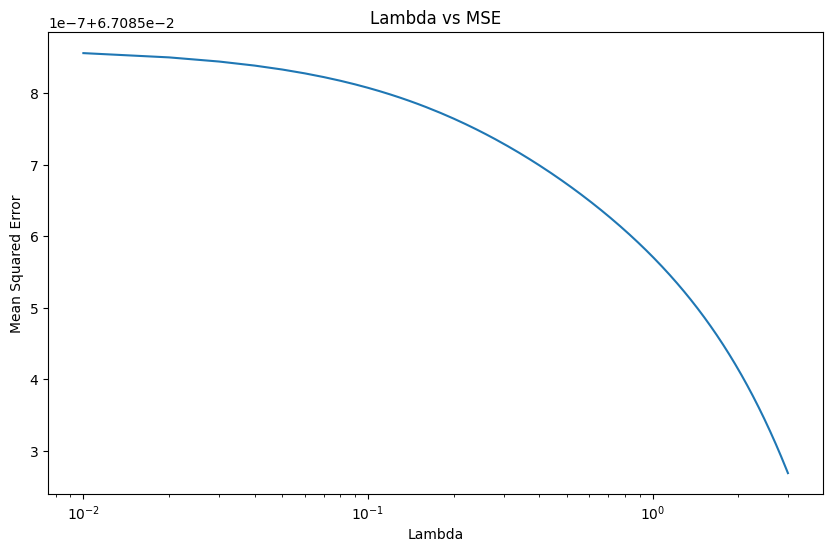

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score




# Check data shapes
print(f"X_train shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")



# Create a range of lambda values
lambdas = np.arange(0.01, 3, 0.01)
mse_scores = []

# Perform cross-validation for each lambda value
for lambda_value in lambdas:
    ridge = Ridge(alpha=lambda_value)
    scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())  # Convert to positive MSE


#find the best lambda
best_lambda_index = np.argmin(mse_scores)
best_lambda = lambdas[best_lambda_index]
print(f"Best lambda (alpha): {best_lambda:.4f}")

# Plot lambda vs MSE
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mse_scores)
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lambda vs MSE')
plt.show()




In [30]:
# Fit a new Ridge model with the best lambda
best_ridge = Ridge(alpha=best_lambda, solver='svd')
best_ridge.fit(X_train_scaled, y_train)

# Make predictions on training and test data
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Calculate MSE for training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"(a) Mean Squared Error for the best model on training data: {train_mse:.4f}")
print(f"(b) Mean Squared Error for the best model on test data: {test_mse:.4f}")

#except Exception as e:
   # print(f"Error during model fitting: {e}")

(a) Mean Squared Error for the best model on training data: 0.0668
(b) Mean Squared Error for the best model on test data: 0.0677


In [31]:
# Optional: Check for multicollinearity
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit(X_train_scaled)
print(f"Number of features before selection: {X_train_scaled.shape[1]}")
print(f"Number of features after selection: {selector.get_support().sum()}")

Number of features before selection: 29
Number of features after selection: 29


# **1.3 Lasso Regression model using the same values for Lambda**

Best lambda (alpha): 0.0100


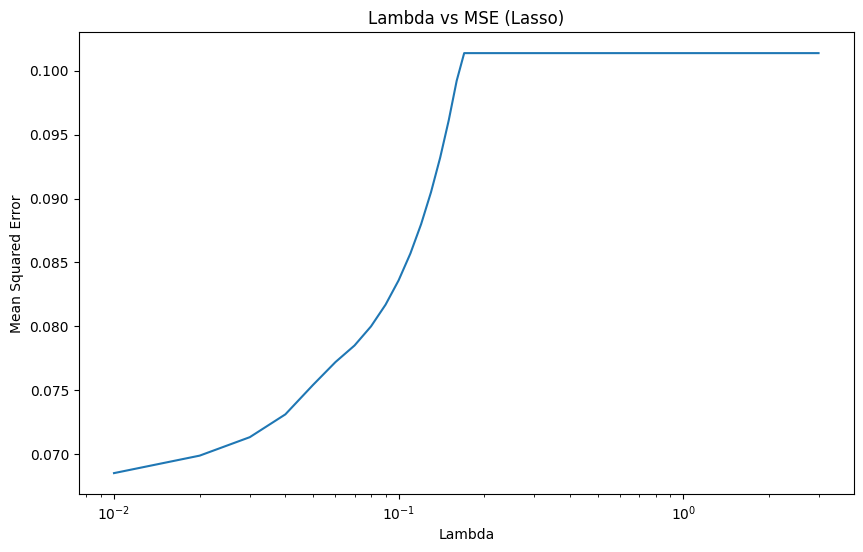

(a) Mean Squared Error for the best model on training data: 0.0685
(b) Mean Squared Error for the best model on test data: 0.0694
Number of features used by the model: 8


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Create a range of lambda values
lambdas = np.arange(0.01, 3, 0.01)

try:
    # Use LassoCV to find the best alpha (lambda)
    lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=42)
    lasso_cv.fit(X_train_scaled, y_train)

    # Get the best lambda (alpha)
    best_lambda = lasso_cv.alpha_
    print(f"Best lambda (alpha): {best_lambda:.4f}")

    # Plot lambda vs MSE
    plt.figure(figsize=(10, 6))
    plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
    plt.xlabel('Lambda')
    plt.ylabel('Mean Squared Error')
    plt.title('Lambda vs MSE (Lasso)')
    plt.show()

    # Fit a new Lasso model with the best lambda
    best_lasso = Lasso(alpha=best_lambda, random_state=42)
    best_lasso.fit(X_train_scaled, y_train)

    # Make predictions on training and test data
    y_train_pred = best_lasso.predict(X_train_scaled)
    y_test_pred = best_lasso.predict(X_test_scaled)

    # Calculate MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"(a) Mean Squared Error for the best model on training data: {train_mse:.4f}")
    print(f"(b) Mean Squared Error for the best model on test data: {test_mse:.4f}")

    # Optional: Print number of features used by the model
    n_features_used = np.sum(best_lasso.coef_ != 0)
    print(f"Number of features used by the model: {n_features_used}")

except Exception as e:
    print(f"Error during model fitting: {e}")

In [34]:
# Get feature names
feature_names = X_train.columns.tolist()

    # Create a dataframe of feature names and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lasso.coef_
    })

    # Sort by absolute value of coefficient, descending
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

    # Print all non-zero coefficients
print("\nNon-zero coefficients:")
print(coef_df[coef_df['Coefficient'] != 0])


Non-zero coefficients:
               Feature  Coefficient  Abs_Coefficient
20          recoveries     0.144110         0.144110
3                grade     0.037311         0.037311
17     total_rec_prncp    -0.035875         0.035875
22     last_pymnt_amnt    -0.012793         0.012793
19  total_rec_late_fee     0.009837         0.009837
24    application_type    -0.005708         0.005708
9       inq_last_6mths     0.004120         0.004120
2          installment     0.002258         0.002258


# **1.4 Random Forest**

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#let's do some parameter grid search
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
(a) Mean Squared Error for the best model on training data: 0.0060
(b) Mean Squared Error for the best model on test data: 0.0207

Feature Importances:
                       Feature  Importance
20                  recoveries    0.675336
1                     int_rate    0.052276
2                  installment    0.037491
17             total_rec_prncp    0.036050
22             last_pymnt_amnt    0.022664
15                 total_pymnt    0.016352
16             total_pymnt_inv    0.015996
0                    loan_amnt    0.014716
18               total_rec_int    0.014515
3                        grade    0.012864
27                 tot_cur_bal    0.011430
7                          dti    0.011426
13                  revol_util    0.011293
6                   annual_inc    0.009954
28            total_rev_hi_lim    0.009435
12                   revol_bal    0.009341
14       

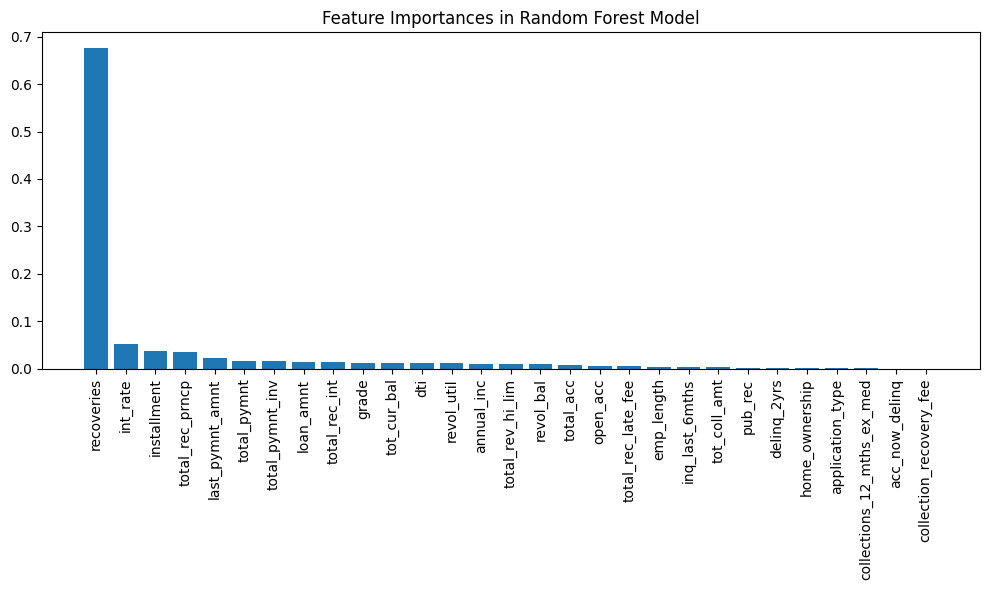

In [47]:
# Create a base model
rf = RandomForestRegressor(n_estimators=50,random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=24, cv=3, random_state=42, n_jobs=-1)
try:
    # Fit the random search model
    random_search.fit(X_train_scaled, y_train)

    # Get the best model
    best_rf = random_search.best_estimator_

    # Print the best parameters
    print("Best parameters:", random_search.best_params_)

    # Make predictions on training and test data
    y_train_pred = best_rf.predict(X_train_scaled)
    y_test_pred = best_rf.predict(X_test_scaled)
    # Calculate MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"(a) Mean Squared Error for the best model on training data: {train_mse:.4f}")
    print(f"(b) Mean Squared Error for the best model on test data: {test_mse:.4f}")
    # Get feature importances
    feature_names = X_train.columns.tolist()
    importances = best_rf.feature_importances_

    # Create a dataframe of feature names and their importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    # Sort by importance, descending
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Print feature importances
    print("\nFeature Importances:")
    print(feature_importance_df)

    # Print number of features used (all features are typically used in Random Forest)
    n_features_used = len(feature_names)
    print(f"\nNumber of features used by the model: {n_features_used}")

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xticks(rotation=90)
    plt.title('Feature Importances in Random Forest Model')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error during model fitting: {e}")



# **1.5 Neural Networks**

In [48]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Create and train the neural network
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

# Calculate R-squared (which is often used as "Accuracy" for regression problems)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"(a) R-squared (Accuracy) for the model on training data: {train_r2:.4f}")
print(f"   Mean Squared Error for the model on training data: {train_mse:.4f}")
print(f"(b) R-squared (Accuracy) for the model on testing data: {test_r2:.4f}")
print(f"   Mean Squared Error for the model on testing data: {test_mse:.4f}")

print("\n(c) Explanation for choosing this Neural Network model:")
print("I chose the Multi-Layer Perceptron (MLP) Regressor for the following reasons:")
print("1. It's suitable for regression problems, which matches our task.")
print("2. It can capture non-linear relationships in the data.")
print("3. It's relatively simple to implement and interpret compared to more complex neural network architectures.")
print("4. It's available in scikit-learn, making it easy to integrate with our existing workflow.")
print("5. The chosen architecture (100, 50) provides a good balance between model complexity and computational efficiency.")
print("6. We can easily adjust the complexity by changing the hidden layer sizes if needed.")

(a) R-squared (Accuracy) for the model on training data: 0.3847
   Mean Squared Error for the model on training data: 0.0624
(b) R-squared (Accuracy) for the model on testing data: 0.6804
   Mean Squared Error for the model on testing data: 0.0325

(c) Explanation for choosing this Neural Network model:
I chose the Multi-Layer Perceptron (MLP) Regressor for the following reasons:
1. It's suitable for regression problems, which matches our task.
2. It can capture non-linear relationships in the data.
3. It's relatively simple to implement and interpret compared to more complex neural network architectures.
4. It's available in scikit-learn, making it easy to integrate with our existing workflow.
5. The chosen architecture (100, 50) provides a good balance between model complexity and computational efficiency.
6. We can easily adjust the complexity by changing the hidden layer sizes if needed.


let's try a different NN


In [52]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"(a) Training Accuracy: {train_accuracy:.4f}")
print(f"    Training Loss (Binary Cross-Entropy): {train_loss:.4f}")
print(f"(b) Testing Accuracy: {test_accuracy:.4f}")
print(f"    Testing Loss (Binary Cross-Entropy): {test_loss:.4f}")

# Get predictions
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("\n(c) Explanation for choosing this Neural Network model:")
print("I chose this Keras Sequential model for binary classification for the following reasons:")
print("1. It's suitable for binary classification problems.")
print("2. It uses binary cross-entropy loss, which is appropriate for binary classification.")
print("3. It directly outputs accuracy as a metric, which is easily interpretable.")
print("4. The architecture (64 -> 32 -> 1) provides a good balance between model complexity and efficiency.")
print("5. The final layer uses a sigmoid activation function, which outputs probabilities between 0 and 1.")
print("6. Keras offers flexibility in design and is suitable for both small and large datasets.")
print("7. It's easy to modify and experiment with different architectures and hyperparameters.")

Epoch 1/50
5466/5466 [==============================] - 18s 3ms/step - loss: 0.1383 - accuracy: 0.9568 - val_loss: 0.1300 - val_accuracy: 0.9585
Epoch 2/50
5466/5466 [==============================] - 15s 3ms/step - loss: 0.1238 - accuracy: 0.9614 - val_loss: 0.1262 - val_accuracy: 0.9591
Epoch 3/50
5466/5466 [==============================] - 12s 2ms/step - loss: 0.1229 - accuracy: 0.9621 - val_loss: 0.1247 - val_accuracy: 0.9602
Epoch 4/50
5466/5466 [==============================] - 14s 3ms/step - loss: 0.1194 - accuracy: 0.9625 - val_loss: 0.1244 - val_accuracy: 0.9602
Epoch 5/50
5466/5466 [==============================] - 14s 3ms/step - loss: 0.1183 - accuracy: 0.9629 - val_loss: 0.1208 - val_accuracy: 0.9610
Epoch 6/50
5466/5466 [==============================] - 14s 3ms/step - loss: 0.1167 - accuracy: 0.9634 - val_loss: 0.1211 - val_accuracy: 0.9611
Epoch 7/50
5466/5466 [==============================] - 14s 3ms/step - loss: 0.1160 - accuracy: 0.9634 - val_loss: 0.1207 - val_ac

In [59]:
new_train_data.columns.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'y']

In [62]:
# extract the weights of the model
weights = model.get_weights()

# Print the weights including bias terms for the first layer
print("Weights including bias terms for the first layer:")
print(weights[0])

Weights including bias terms for the first layer:
[[-0.0274668  -1.0363355   0.7865143  ...  0.01235441  0.06058423
   0.2447051 ]
 [-0.49119043 -0.23822172  0.19906636 ...  1.2905843   1.3415223
  -0.9179054 ]
 [ 0.34992215 -1.2449006  -0.3435568  ...  0.17339705  0.37119833
   0.2797804 ]
 ...
 [-1.1464124   0.2873338  -0.3936619  ...  0.3424783   0.05475947
  -1.5460967 ]
 [ 0.42388925  0.46798876  0.25741842 ... -0.03370652 -0.36219636
  -0.2710986 ]
 [-0.14119835 -0.63215506  0.60921556 ...  0.01822434  0.0652433
  -0.26479194]]


In [66]:
variable_list = new_train_data.columns.tolist()
variable_list.remove('y')

# Extract the weights of the first layer
weights_first_layer = weights[0]

# Calculate the absolute mean weights for each predictor
absolute_mean_weights = np.abs(weights_first_layer).mean(axis=0)

# dictionary initiation
predictor_weights = dict(zip(variable_list, absolute_mean_weights))

# Sort the predictor weights based on their absolute mean values
sorted_predictor_weights = sorted(predictor_weights.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 predictors related to the output
top_predictors = sorted_predictor_weights[:10]

# Extract least 10 predictors related to the output
least_predictors = sorted_predictor_weights[-10:]

print("Top 10 predictors related to the output:")
for predictor, weight in top_predictors:
    print(f"{predictor}: Absolute Weight = {weight}")

print("\nLeast 10 predictors related to the output:")
for predictor, weight in least_predictors:
    print(f"{predictor}: Absolute Weight = {weight}")

Top 10 predictors related to the output:
open_acc: Absolute Weight = 0.5795968770980835
loan_amnt: Absolute Weight = 0.5233978629112244
revol_util: Absolute Weight = 0.5023958086967468
tot_cur_bal: Absolute Weight = 0.502237856388092
annual_inc: Absolute Weight = 0.4972117245197296
collection_recovery_fee: Absolute Weight = 0.49495595693588257
emp_length: Absolute Weight = 0.4945349395275116
last_pymnt_amnt: Absolute Weight = 0.49124616384506226
int_rate: Absolute Weight = 0.4892039895057678
total_pymnt_inv: Absolute Weight = 0.4732535183429718

Least 10 predictors related to the output:
collections_12_mths_ex_med: Absolute Weight = 0.43234437704086304
inq_last_6mths: Absolute Weight = 0.43125587701797485
tot_coll_amt: Absolute Weight = 0.4299125671386719
total_rec_int: Absolute Weight = 0.4204706847667694
revol_bal: Absolute Weight = 0.39381399750709534
total_rec_late_fee: Absolute Weight = 0.3879539966583252
application_type: Absolute Weight = 0.38201069831848145
total_acc: Absolute 